[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nichangyuan/ML-DL/blob/master/Deep%20Learning/ANN/lr_ANN.ipynb)

## Applying Artificial Neural Networks (ANNs) for Linear Regression: 
the ANN code adopted from the following 2 sources:

https://sdsclub.com/applying-artificial-neural-networks-anns-for-linear-regression-yay-or-nay/?utm_content=educational&utm_campaign=2020-06-17&utm_source=email-sendgrid&utm_term=27129696&utm_medium=2968892

https://www.geeksforgeeks.org/linear-regression-using-tensorflow/

In [1]:
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


In [2]:
np.random.seed(101)
tf.set_random_seed(101)   #tf.random.set_seed(101) -- version 2

In [3]:
# generating random linear data
# 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x) # Number of data points

1. First, let's do a routine pre-analysis diagnosis of the data

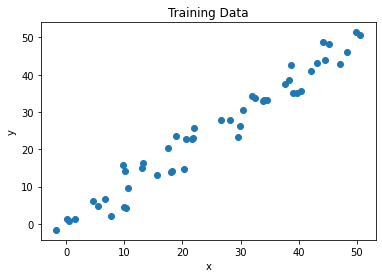

In [4]:
# Plot of training data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import statistics as stats

pd.set_option('display.max_rows', 100) 
%matplotlib inline


In [12]:
df = pd.DataFrame({'X':x,'Y':y})
df.head(5)

,X,Y
0,0.131189,1.445422
1,1.585749,1.192794
2,-1.731390,-1.612010
3,0.433398,0.852717
4,5.563849,4.683273


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       50 non-null     float64
 1   Y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [14]:
df.columns

Index(['X', 'Y'], dtype='object')

In [18]:
from scipy.stats import describe
describe(df, axis=0)

DescribeResult(nobs=50, minmax=(array([-1.73138986, -1.61201012]), array([50.59056093, 51.40223081])), mean=array([25.13057701, 24.78607989]), variance=array([231.66828086, 235.87698055]), skewness=array([-0.03937276, -0.03462013]), kurtosis=array([-1.20396216, -1.12718482]))

In [20]:
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.T #transpose()

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
X,50.0,25.130577,15.220653,-1.73139,11.227182,24.340735,38.573859,50.590561,231.668281,-0.040601,-1.203325
Y,50.0,24.786080,15.358287,-1.61201,14.042299,24.702840,35.472477,51.402231,235.876981,-0.035700,-1.118278


(2.5, -0.5)

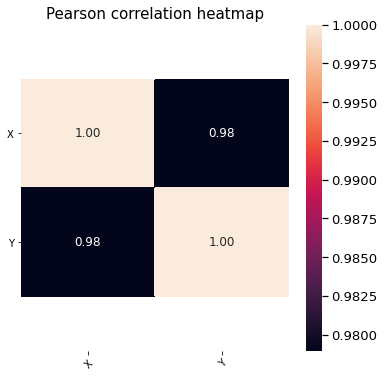

In [21]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))
sns.set_context("notebook", font_scale=1.2, rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":18})

ax = sns.heatmap(df.corr("pearson"), annot=True, fmt=".2f")
plt.title("Pearson correlation heatmap")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")  
#ax.set_yticklabels(rotation=0)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  
#ax.set_xticks(rotation=30)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

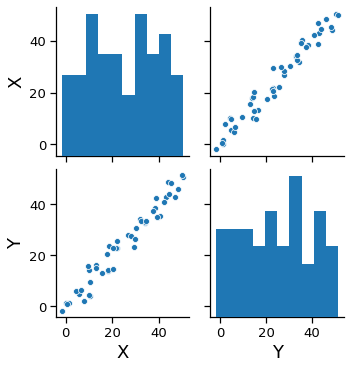

In [23]:
g = sns.pairplot(df)

2. Next, let's run the classical linear regression with machine learning packages

In [33]:
X_train = df[['X']]
y_train = df['Y']

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

steps = [('Rescale', MinMaxScaler()),
         ('lr', LinearRegression()),  ]
model = Pipeline(steps)

model.fit(X_train, y_train)
model[1].coef_, model[1].intercept_

(array([51.68371055]), -1.7482159323553503)

In [36]:
y_pred = model.predict(X_train)
y_pred, y

(array([ 0.09164261,  1.52845925, -1.74821593,  0.39016488,  5.45803274,
         7.64044936,  4.48438649, 10.12827338,  9.77647218,  6.58347133,
        10.47019162,  9.88110925,  9.54376683, 15.32248864, 17.7519472 ,
        12.96641523, 12.79855843, 17.91567146, 19.91494534, 17.34505753,
        21.58563891, 21.27042875, 18.56913164, 20.28344738, 21.67940246,
        29.06738055, 26.33234355, 27.79962541, 30.0405961 , 29.52451899,
        33.46579081, 33.64215382, 31.45025115, 32.09649102, 37.81154319,
        34.00499715, 39.13381563, 39.86659786, 38.56613529, 42.61105625,
        37.09697447, 38.14998712, 43.88880525, 46.39010554, 41.62203785,
        43.54677545, 47.69135424, 44.68340027, 49.93549462, 49.25442596]),
 array([ 1.44542215,  1.1927937 , -1.61201012,  0.85271732,  4.68327335,
         2.0655101 ,  6.12338269,  4.24693369,  4.58573251,  6.60988885,
         9.74302668, 14.24518839, 15.83901099, 13.09064546, 13.97466902,
        16.4044347 , 14.92339458, 14.28756352, 14

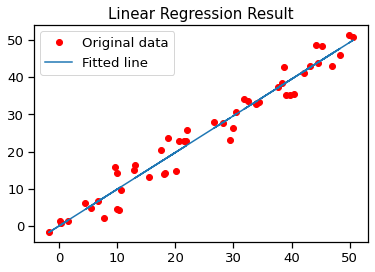

In [37]:
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, y_pred, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
#plt.show() 

3. Now, it's time to advance to exploring linear regression with ANN !!!


In [47]:
# Define the placeholders for x & y
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Define 2 trainable Tensorflow variables for bias and weights. np.random.randn() will initialize them randomly
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

# Define model's hyperparameters: Number of Epochs & the learning Rate
learning_rate = 0.01
training_epochs = 1000

In [48]:
# Build the cost optimizer, cost function, and the hypothesis. We are not going to implement the Gradient Descent Optimizer manually. That's because it's in-built. Now it's time to initianize the variables.

#Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)

# Mean Squared Error Cost Function
# a = tf.pow(y_pred-Y, 2)
# b = tf.reduce_sum(a)
# c = b/(2*n)
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

In [49]:
# Now we will begin the training process inside a Tensorflow Session.
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 




Epoch 50 : cost = 5.886804 W = 0.9951241 b = 1.2381054
Epoch 100 : cost = 5.7912707 W = 0.99812365 b = 1.0914398
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044314
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.8434396
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.73893565
Epoch 300 : cost = 5.544605 W = 1.0072418 b = 0.6455924
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56222016
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775372
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124188
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183503
Epoch 550 : cost = 5.4019217 W = 1.0141305 b = 0.3087744
Epoch 600 : cost = 5.3848577 W = 1.0150996 b = 0.26138142
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905117
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124233
Epoch 750 : cost = 5.346891 W = 1.0174292 b = 0.14747268
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730959
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.09036876
Epoch 900 : cost = 5.322459 W

In [50]:
# Now let us look at the result.
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 5.3110337 Weight = 1.0199214 bias = 0.02561676 



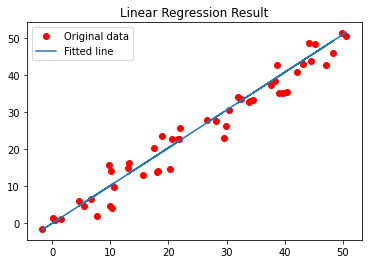

In [51]:
# Finally, we will plot our result.
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
